Load the scripts for predicting using the ConvNet model

In [1]:
from os import getcwd, path
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()

DATA_UTILS = path.join(BASE_PATH, 'data_utils.py')
CONV_MODEL = path.join(BASE_PATH, 'convnet/predict.py')
DATA_UTILS = path.join(BASE_PATH, 'data_utils.py')

exec(open(DATA_UTILS).read())
exec(open(CONV_MODEL).read())
exec(open(DATA_UTILS).read())

/Users/2359media/anaconda/envs/botbot-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
MODEL_PATH = path.join(BASE_PATH, 'convnet/model/model.h5')
TOKENIZER_PATH = path.join(BASE_PATH, 'convnet/model/tokenizer.pickle')
CLASSES_PATH = path.join(BASE_PATH, 'convnet/model/classes.json')

load_saved_model(MODEL_PATH, ignore_cache=True)
load_tokenizer(TOKENIZER_PATH, ignore_cache=True)
load_classes(CLASSES_PATH, ignore_cache=True)

['Baby Care - Nappy Rash - Use Cream?',
 'SmallTalk - WhereAreYouFrom',
 'Medical - Constipation - Food',
 'Birth - Labour - Fear - During - How To',
 'Prenatal - Travel - Flying - DVT',
 'Medical - Eclampsia - Symptoms IT',
 'Symptoms - ItchySkin - Treatment',
 'Medical - HIV - Baby need treatment',
 'Diet - Dieting during Pregnancy',
 'Medical - Miscarriage - Auto Immune',
 'Birth - Breech - Risks To Baby',
 'Medical - Molar Pregnancy - Complications',
 'Birth - Labour - Epidural - Should I?',
 'Baby Care - Medical - Colic',
 'Postnatal - Exercise - Can I - 6 Months',
 'Baby Care - Nutrition - Commercial',
 'Exercise - Yoga - Poses IT',
 'RequestName',
 'Postnatal - Breastfeeding - Burping - How',
 'Postnatal - Breastfeeding - Benefit - Benefits',
 'Birth - Premature - HMD',
 'Medical - Perinatal Mortality - Cause',
 'Birth - Natural - Why',
 'Prenatal - Ultrasounds - 3d - time',
 'Greeting-Yes',
 'Postnatal - MentalHealth - Bipolar - What is it',
 'Prenatal - Sex - Squash Baby?',
 '

In [3]:
next(interpret_netout(run_predict('My baby has a fever')))

('Baby Care - Medical - Fever', 81.87417984008789)

Try to run samples through the model to see false evaluations
This will help isolate the examples that make the model confused

In [4]:
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

result = list(interpret_netout(run_predict(X_data)))

cell_text = []
for (idx, (result_class, proba)) in list(enumerate(result)):
    if y_data[idx] != result_class:
        cell_text.append([X_data[idx], y_data[idx], result_class, proba])

Found 656 (accuracy: -5.4) misassigned examples. Showing the top 20


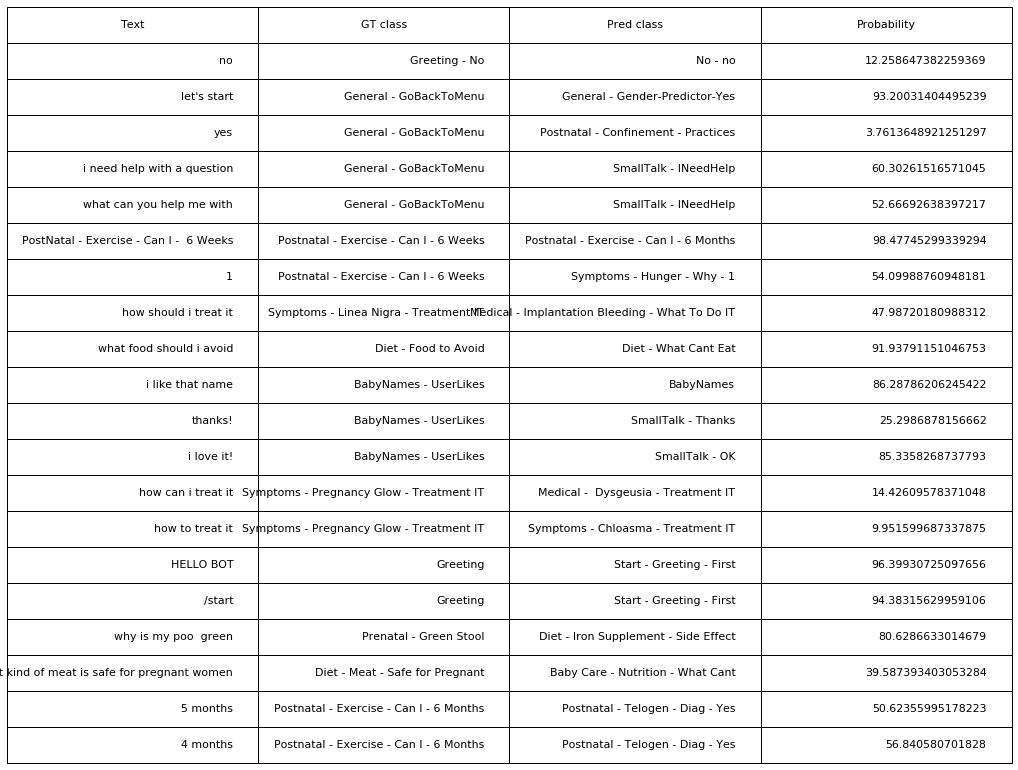

In [9]:
import matplotlib.pyplot as plt

print('Found %s (accuracy: %s) misassigned examples. Showing the top 20' \
    % (len(cell_text), 1 - round(len(cell_text) / len(X_data) * 100, 2)))

if len(cell_text) > 0:
    table = plt.table(cellText=cell_text[:20],
              colLabels=['Text', 'GT class', 'Pred class', 'Probability'],
              loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(3,3)
    plt.axis('off')
    plt.show()